# 텍스트 전처리, Text Preprocessing
---
1. **자연어처리 라이브러리 설치** : NLTK, KoNLPy
1. **토근화 (Tokenization)** : 데이터를 의미있는 기본 단위로 분리하는 작업
1. **품사 태깅 (POS Tagging)** : 토큰에 품사를 태깅하는 작업
1. **정제 (Cleaning)** : 불필요한 기호나 문자를 제거하는 작업
1. **정규화 (Normalization)** : 형태가 다른 단어를 하나의 형태로 통합하는 작업. 대/소문자 통합, 유사의미 단어통합

## 1. 자연어 처리 라이브러리 설치 (NLTK, KoNLPy)

In [1]:
import nltk
nltk.__version__

'3.9.1'

In [2]:
# NLTK data 설치
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [3]:
import konlpy
konlpy.__version__

'0.6.0'

## 2. 토근화 (Tokenization)

### 2-1. NLTK를 활용한 토큰화 : nltk.tokenize

In [32]:
text = "Hello, everyone. It's good to see you. Let's start out NLP class!"

In [34]:
# word_tokenize, sent_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize

# 문장 토큰
print("문장 토큰화 : ", sent_tokenize(text))

# 단어 토큰화
print("단어 토큰화 : ", word_tokenize(text))

문장 토큰화 :  ['Hello, everyone.', "It's good to see you.", "Let's start out NLP class!"]
단어 토큰화 :  ['Hello', ',', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'out', 'NLP', 'class', '!']


In [36]:
# WordPunctTokenizer, TreebankWordTokenizer
from nltk.tokenize import WordPunctTokenizer, TreebankWordTokenizer

wpTokenizer = WordPunctTokenizer()
print(wpTokenizer.tokenize(text))

tbTokenizer = TreebankWordTokenizer()
print(tbTokenizer.tokenize(text))


['Hello', ',', 'everyone', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'out', 'NLP', 'class', '!']
['Hello', ',', 'everyone.', 'It', "'s", 'good', 'to', 'see', 'you.', 'Let', "'s", 'start', 'out', 'NLP', 'class', '!']


### 2-2. 한국어 토큰화 : konlpy.tag

In [5]:
kor_text = "안녕하세요, 여러분. 만나서 반갑습니다. 지금부터 자연어처리 수업을 시작하겠습니다."

In [6]:
# nltk로 토큰화
from nltk.tokenize import word_tokenize, sent_tokenize

# 문장 분리
print(sent_tokenize(kor_text))

# 단어 토큰화
print(word_tokenize(kor_text))

['안녕하세요, 여러분.', '만나서 반갑습니다.', '지금부터 자연어처리 수업을 시작하겠습니다.']
['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '지금부터', '자연어처리', '수업을', '시작하겠습니다', '.']


In [8]:
# Okt로 토큰화
from konlpy.tag import Okt
okt = Okt()
okt.morphs(kor_text)

['안녕하세요',
 ',',
 '여러분',
 '.',
 '만나서',
 '반갑습니다',
 '.',
 '지금',
 '부터',
 '자연어',
 '처리',
 '수업',
 '을',
 '시작',
 '하겠습니다',
 '.']

In [9]:
# Komoran으로 토큰화
from konlpy.tag import Komoran
komo = Komoran()
komo.morphs(kor_text)

['안녕하세요',
 ',',
 '여러분',
 '.',
 '만나',
 '아서',
 '반갑습니다',
 '.',
 '지금',
 '부터',
 '자연어',
 '처리',
 '수업',
 '을',
 '시작',
 '하',
 '겠',
 '습니다',
 '.']

## 3. 품사 태깅 (POS Tagging)

### 3-1. NLTK 활용 품사 태깅 : nltk.pos_tag(token_list)

In [40]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk.tokenize import word_tokenize
sent = "Hello everyone. It's good to see you. Let's start our text mining class!"

# 토큰화
token_list = word_tokenize(sent)

# 품사태깅
nltk.pos_tag(token_list)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


[('Hello', 'NNP'),
 ('everyone', 'NN'),
 ('.', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('good', 'JJ'),
 ('to', 'TO'),
 ('see', 'VB'),
 ('you', 'PRP'),
 ('.', '.'),
 ('Let', 'VB'),
 ("'s", 'POS'),
 ('start', 'VB'),
 ('our', 'PRP$'),
 ('text', 'NN'),
 ('mining', 'NN'),
 ('class', 'NN'),
 ('!', '.')]

* 품사명 알아보기 : nltk.help.upenn_tagset(품사명)
    - nltk.download('tagsets')

In [41]:
nltk.download('tagsets')
nltk.download('tagsets_json')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.
[nltk_data] Downloading package tagsets_json to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets_json.zip.


True

In [42]:
# 품사명 확인
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


### 3-2. 한글 형태소 분석과 품사 태깅 (konlpy.tag)

In [10]:
kor_text = '''절망의 반대가 희망은 아니다.
어두운 밤하늘에 별이 빛나듯
희망은 절망 속에 싹트는 거지
만약에 우리가 희망함이 적다면
그 누가 세상을 비추어줄까.
정희성, 희망 공부'''

In [43]:
# nltk로 한글 품사 태깅
tokens = word_tokenize(kor_text)
print(tokens)
print(nltk.pos_tag(tokens))

['절망의', '반대가', '희망은', '아니다', '.', '어두운', '밤하늘에', '별이', '빛나듯', '희망은', '절망', '속에', '싹트는', '거지', '만약에', '우리가', '희망함이', '적다면', '그', '누가', '세상을', '비추어줄까', '.', '정희성', ',', '희망', '공부']
[('절망의', 'JJ'), ('반대가', 'NNP'), ('희망은', 'NNP'), ('아니다', 'NNP'), ('.', '.'), ('어두운', 'VB'), ('밤하늘에', 'JJ'), ('별이', 'NNP'), ('빛나듯', 'NNP'), ('희망은', 'NNP'), ('절망', 'NNP'), ('속에', 'NNP'), ('싹트는', 'NNP'), ('거지', 'NNP'), ('만약에', 'NNP'), ('우리가', 'NNP'), ('희망함이', 'NNP'), ('적다면', 'NNP'), ('그', 'NNP'), ('누가', 'NNP'), ('세상을', 'NNP'), ('비추어줄까', 'NNP'), ('.', '.'), ('정희성', 'NN'), (',', ','), ('희망', 'NNP'), ('공부', 'NNP')]


In [13]:
# Okt로 형태소 분석, 품사 태깅, 명사 추출
print("형태소 분석 : ", okt.morphs(kor_text))
print()
print("품사 태깅 : ", okt.pos(kor_text))
print()
print("명사 추출 : ", okt.nouns(kor_text))

형태소 분석 :  ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비추어줄까', '.', '\n', '정희성', ',', '희망', '공부']

품사 태깅 :  [('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 'Noun'), ('을', 'Josa'), ('비추어줄까', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('정희성', 'Noun'), (',', 'Punctuation'),

In [49]:
# Komoran으로 형태소 분석, 품사 태깅, 명사 추출
print(komo.morphs(kor_text))

print(komo.pos(kor_text))

print(komo.nouns(kor_text))

['절망', '의', '반대', '가', '희망', '은', '아니', '다', '.', '어둡', 'ㄴ', '밤하늘', '에', '별', '이', '빛나', '듯', '희망', '은', '절망', '속', '에', '싹트', '는', '거지', '만약', '에', '우리', '가', '희망', '하', 'ㅁ', '이', '적', '다면', '그', '누구', '가', '세상', '을', '비추', '어', '주', 'ㄹ까', '.', '정희성', ',', '희망', '공부']
[('절망', 'NNG'), ('의', 'JKG'), ('반대', 'NNG'), ('가', 'JKS'), ('희망', 'NNG'), ('은', 'JX'), ('아니', 'VCN'), ('다', 'EF'), ('.', 'SF'), ('어둡', 'VA'), ('ㄴ', 'ETM'), ('밤하늘', 'NNP'), ('에', 'JKB'), ('별', 'NNG'), ('이', 'JKS'), ('빛나', 'VV'), ('듯', 'EC'), ('희망', 'NNG'), ('은', 'JX'), ('절망', 'NNG'), ('속', 'NNG'), ('에', 'JKB'), ('싹트', 'VV'), ('는', 'ETM'), ('거지', 'NNG'), ('만약', 'NNG'), ('에', 'JKB'), ('우리', 'NP'), ('가', 'JKS'), ('희망', 'NNG'), ('하', 'XSV'), ('ㅁ', 'ETN'), ('이', 'JKS'), ('적', 'VA'), ('다면', 'EC'), ('그', 'MM'), ('누구', 'NP'), ('가', 'JKS'), ('세상', 'NNG'), ('을', 'JKO'), ('비추', 'VV'), ('어', 'EC'), ('주', 'VX'), ('ㄹ까', 'EF'), ('.', 'SF'), ('정희성', 'NNP'), (',', 'SP'), ('희망', 'NNG'), ('공부', 'NNG')]
['절망', '반대', '희망', '밤하늘', '별', '희망', '

## 4. 정제 (Cleaning)

### 4-1. 불필요한 기호 삭제

In [15]:
import re
text = "Hello, everyone. It's good to see you. Let's start out NLP class~~~~!"

# [영어] 문자, 숫자, ' 가 아닌 기호 삭제
clean_text = re.sub("[^A-Za-z0-9']+", " ", text)
print(clean_text)

Hello everyone It's good to see you Let's start out NLP class 


In [20]:
# 한글만 남기고 삭제
clean_kor_text = re.sub("[^가-힣]+", " ", kor_text)
print(clean_kor_text)

절망의 반대가 희망은 아니다 어두운 밤하늘에 별이 빛나듯 희망은 절망 속에 싹트는 거지 만약에 우리가 희망함이 적다면 그 누가 세상을 비추어줄까 정희성 희망 공부


#### 정규 표현식 연습

In [50]:
import re
text1 = "543 cat camera 자연어처리~~~~ good^^"

#영어만, 숫자만, 한글만, 기호만
p = re.compile('[^a-z0-9]+')
print(p.findall(text1))

[' ', ' ', ' 자연어처리~~~~ ', '^^']


In [52]:
# 이메일 주소 검증
email_pattern = re.compile(r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}')
email = input("이메일 주소를 입력하세요 : ")
if email_pattern.match(email):
    print("이메일 주소가 맞습니다.")
else:
    print("잘못된 이메일입니다.")

이메일 주소를 입력하세요 :  hdsfjjhsdksd3@dasdasfga


잘못된 이메일입니다.


### 4-2. 불용어(Stopwords) 제거

#### 불용어 사전을 사용하여, 사전에 있는 단어를 삭제

In [53]:
# [영어] nltk 불용어 사전 확인
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
print(len(english_stopwords))
print(english_stopwords)

198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 

In [54]:
# [영어] 불용어 사전에 있는 단어 제거 : 정규화 -> 정제 -> 토큰화 -> 불용어 제거

clean_text = re.sub(r"[^\w]+", " ", text.lower())
print(clean_text)
tokens = word_tokenize(clean_text)

result = [word for word in tokens if word not in english_stopwords]
print(result)

hello everyone it s good to see you let s start out nlp class 
['hello', 'everyone', 'good', 'see', 'let', 'start', 'nlp', 'class']


In [24]:
# [한글] 사용자 정의 stopwords 를 만들어서 사용
temp = '의 가 은 다 ㄴ 에 이 듯 은 속 에 는 에 가 하 겠 ㅁ 이 적 다면 그 가 을 어 주 ㄹ까 습니다 . ,'
kor_stopwords = temp.split()
print("불용어 : ", kor_stopwords)

# 토큰화
tokens = okt.morphs(kor_text)
print(tokens)

# 불용어 제거
# result = []
# for word in tokens:
#     if word not in kor_stopwords:
#         result.append(word)
result = [word for word in tokens if word not in kor_stopwords]

print('불용어 제거 전 :\n',tokens) 
print('불용어 제거 후 :\n',result)

불용어 :  ['의', '가', '은', '다', 'ㄴ', '에', '이', '듯', '은', '속', '에', '는', '에', '가', '하', '겠', 'ㅁ', '이', '적', '다면', '그', '가', '을', '어', '주', 'ㄹ까', '습니다', '.', ',']
['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비추어줄까', '.', '\n', '정희성', ',', '희망', '공부']
불용어 제거 전 :
 ['절망', '의', '반대', '가', '희망', '은', '아니다', '.', '\n', '어', '두운', '밤하늘', '에', '별', '이', '빛나듯', '\n', '희망', '은', '절망', '속', '에', '싹트는', '거지', '\n', '만약', '에', '우리', '가', '희망', '함', '이', '적다면', '\n', '그', '누가', '세상', '을', '비추어줄까', '.', '\n', '정희성', ',', '희망', '공부']
불용어 제거 후 :
 ['절망', '반대', '희망', '아니다', '\n', '두운', '밤하늘', '별', '빛나듯', '\n', '희망', '절망', '싹트는', '거지', '\n', '만약', '우리', '희망', '함', '적다면', '\n', '누가', '세상', '비추어줄까', '\n', '정희성', '희망', '공부']


#### 품사 태깅을 하여 불용어에 해당하는 품사의 단어를 삭제 
* 한국어 형태소 해석기의 품사태그집합 정보
https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?gid=0#gid=0

In [60]:
# 품사 태깅 결과 검토 -> 원하는 품사 추출
pos_tag_tokens = okt.pos(kor_text)
print(pos_tag_tokens)

[('절망', 'Noun'), ('의', 'Josa'), ('반대', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('은', 'Josa'), ('아니다', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('어', 'Noun'), ('두운', 'Noun'), ('밤하늘', 'Noun'), ('에', 'Josa'), ('별', 'Noun'), ('이', 'Josa'), ('빛나듯', 'Verb'), ('\n', 'Foreign'), ('희망', 'Noun'), ('은', 'Josa'), ('절망', 'Noun'), ('속', 'Noun'), ('에', 'Josa'), ('싹트는', 'Verb'), ('거지', 'Noun'), ('\n', 'Foreign'), ('만약', 'Noun'), ('에', 'Josa'), ('우리', 'Noun'), ('가', 'Josa'), ('희망', 'Noun'), ('함', 'Noun'), ('이', 'Josa'), ('적다면', 'Verb'), ('\n', 'Foreign'), ('그', 'Noun'), ('누가', 'Noun'), ('세상', 'Noun'), ('을', 'Josa'), ('비추어줄까', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('정희성', 'Noun'), (',', 'Punctuation'), ('희망', 'Noun'), ('공부', 'Noun')]


In [61]:
# 원하는 품사의 단어들만 추출
my_tag_set = ['Noun', 'Vervb', 'Adjective']
my_words = []
for word, tag in pos_tag_tokens:
    if tag in my_tag_set:
        my_words.append(word)

print(my_words)

['절망', '반대', '희망', '아니다', '어', '두운', '밤하늘', '별', '희망', '절망', '속', '거지', '만약', '우리', '희망', '함', '그', '누가', '세상', '정희성', '희망', '공부']


## 5. 정규화 (Normalization)
### 5-1. 어간 추출 (Stemming)

In [ ]:
from nltk.stem import PorterStemmer
p_stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

In [ ]:
from nltk.stem import LancasterStemmer
l_stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

In [ ]:
words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
p_result = 
l_result = 
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:', p_result)
print('랭커스터 스테머의 어간 추출 후:', l_result)

### 5-2 표제어 추출 (Lemmatization)

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cooking'))
print(lemmatizer.lemmatize('cooking', pos='v')) #품사를 지정
print(lemmatizer.lemmatize('cookery'))
print(lemmatizer.lemmatize('cookbooks'))

In [ ]:
#comparison of lemmatizing and stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes', pos='v'))

In [ ]:
# Okt로 형태소 분석 시 표제어 추출
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(kor_text))
print()
print(okt.morphs(kor_text, stem = True))

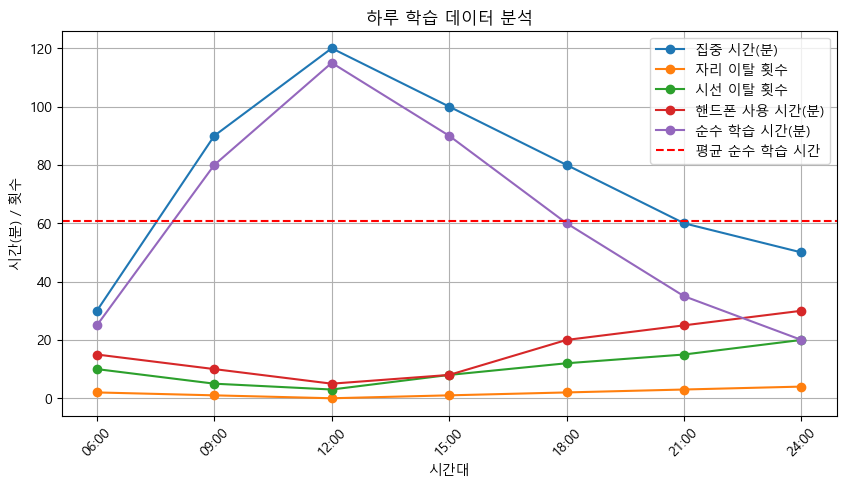